In [1]:
# pip install opendatasets

In [2]:
# Import all the required libraries and modules
import numpy as np
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px 
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv")

Skipping, found downloaded files in ".\google-play-store-apps" (use force=True to force download)


In [4]:
import os
import pandas as pd
os.chdir('C:\\Users\\lipov\\Graduate School\\AAI-501\\Team Project\\google-play-store-apps')
get_ipython().run_line_magic('pwd', '')

'C:\\Users\\lipov\\Graduate School\\AAI-501\\Team Project\\google-play-store-apps'

In [5]:
df1 = pd.read_csv("googleplaystore.csv")
df2 = pd.read_csv("googleplaystore_user_reviews.csv")

In [6]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df1.dropna().head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [9]:
df1.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [10]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [11]:
df2.count()

App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64

<AxesSubplot:ylabel='Frequency'>

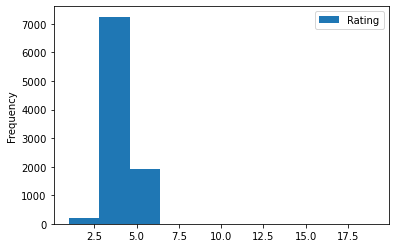

In [12]:
df1.plot.hist()

In [13]:
out1 = (
    df1['App'].str.split('/')
        .explode()
        .value_counts()
        .rename_axis('Genre')
        .reset_index(name='count'))
print(out1.head(10))

                                               Genre  count
0                                             ROBLOX      9
1  CBS Sports App - Scores, News, Stats & Watch Live      8
2                                   Candy Crush Saga      7
3                     Duolingo: Learn Languages Free      7
4                                        8 Ball Pool      7
5                                               ESPN      7
6  Bleacher Report: sports news, scores, & highli...      6
7                                         slither.io      6
8                                    Zombie Catchers      6
9                                     Subway Surfers      6


<AxesSubplot:ylabel='Frequency'>

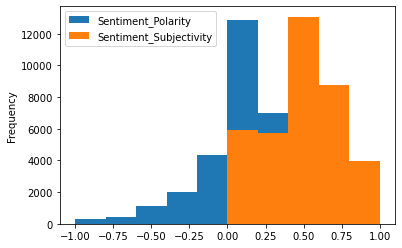

In [14]:
df2.plot.hist()

In [15]:
out2 = (
    df2['App'].str.split('/')
        .explode()
        .value_counts()
        .rename_axis('Genre')
        .reset_index(name='count'))
print(out2.head(20))

                                                Genre  count
0                                 Angry Birds Classic    320
1   CBS Sports App - Scores, News, Stats & Watch Live    320
2                                          Bowmasters    320
3                                         8 Ball Pool    300
4                                          Helix Jump    300
5                      Calorie Counter - MyFitnessPal    260
6                                      Bubble Shooter    260
7                                    Garena Free Fire    240
8   DEAD TARGET: FPS Zombie Apocalypse Survival Games    240
9                      Duolingo: Learn Languages Free    240
10                                               ESPN    240
11                                   Candy Crush Saga    240
12                                       Block Puzzle    220
13                                  Hill Climb Racing    220
14                                   Farm Heroes Saga    220
15                      

In [16]:
df2.dropna().head(1)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333


<AxesSubplot:>

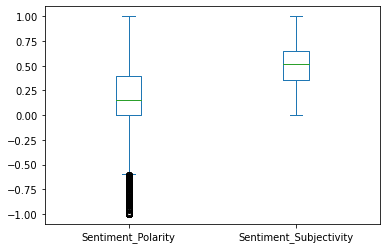

In [17]:
df2.plot.box()

In [18]:
df2 = df2.loc[(df2["Sentiment_Polarity"] > 0)
              & (df2["Sentiment_Subjectivity"] < 0.5)]

<AxesSubplot:ylabel='Frequency'>

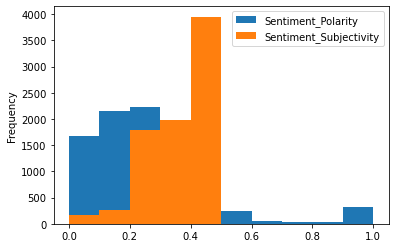

In [19]:
df2.plot.hist()

After summarizing the data above, we are choosing df1 to proceed with the further processing and training. 

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Based on the info above , we will have to clean some of the data further and convert object value to numeric

In [21]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Some of the column names need to be renamed to get the space removed so that it can be used in code easily

In [22]:
#Look for the number of unique Apps
df1['App'].nunique()

9660

In [23]:
#Checking unique categories in the data
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [24]:
#Total number of unique categories
# There are 34 different categoris
df1['Category'].nunique()

34

In [25]:
# The gradation of installations in the dataframe
df1.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [26]:
# There are a lot of app sizes

df1["Size"].nunique()

462

In [27]:
# Looking unique ratings in the dataframe
df1['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [28]:
#Checking number of unique values for the rating
#There are 40 unique ratings in the dataframe
df1['Rating'].nunique()

40

In [29]:
# Viewing the content rating; who is permitted to download these apps
df1["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [30]:
# the number of categories of the age content rating

len(df1["Content Rating"].unique())

7

## Data Cleaning

In [31]:
df1cleaning = df1.copy(deep=True)

In [32]:
df1cleaning.rename({'Content Rating': 'ContentRating', 'Last Updated': 'LastUpdated'}, axis=1, inplace=True)
df1cleaning.rename({'Current Ver': 'CurrentVersion', 'Android Ver': 'AndroidVersion'},axis=1, inplace=True)
df1cleaning.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVersion,AndroidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
#Dropping duplicated rows
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
df1cleaning.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','AndroidVersion'], inplace=True)

In [34]:
#Now check new data frame
df1cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10350 non-null  object 
 1   Category        10350 non-null  object 
 2   Rating          8885 non-null   float64
 3   Reviews         10350 non-null  object 
 4   Size            10350 non-null  object 
 5   Installs        10350 non-null  object 
 6   Type            10349 non-null  object 
 7   Price           10350 non-null  object 
 8   ContentRating   10349 non-null  object 
 9   Genres          10350 non-null  object 
 10  LastUpdated     10350 non-null  object 
 11  CurrentVersion  10342 non-null  object 
 12  AndroidVersion  10347 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<AxesSubplot:>

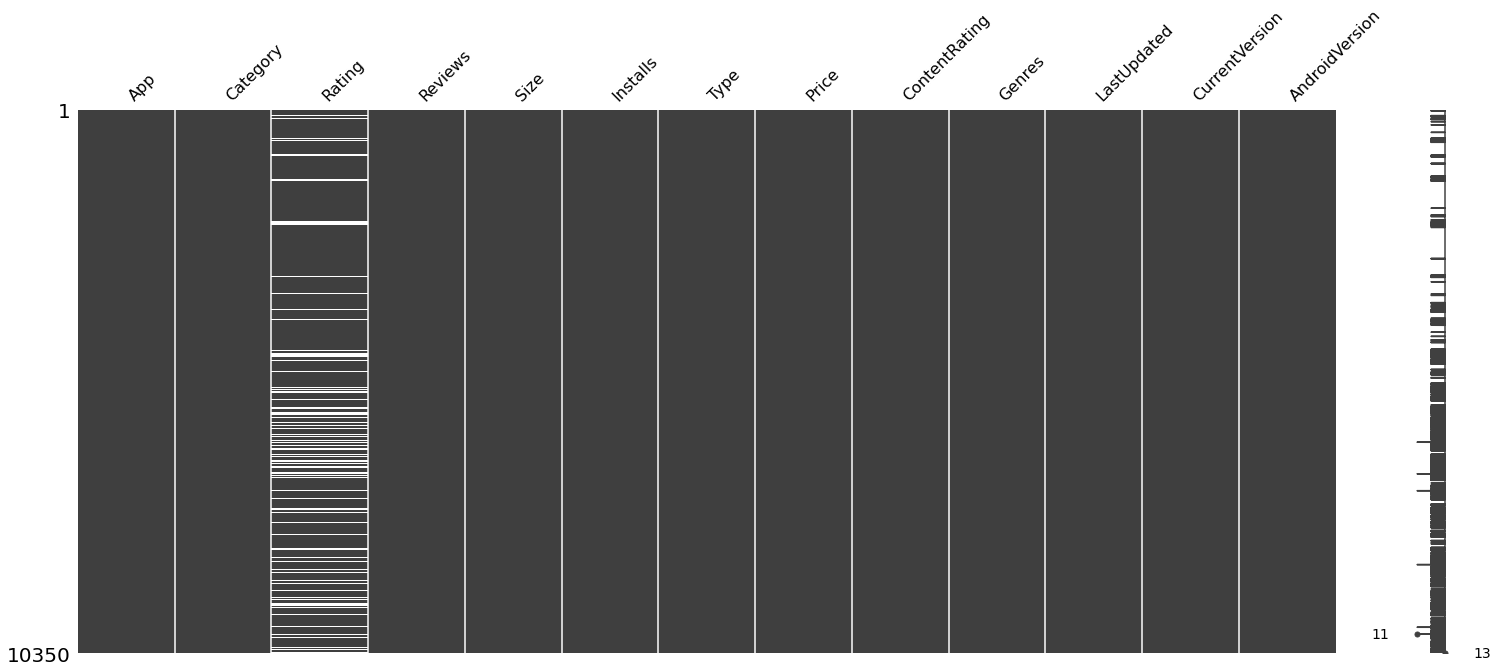

In [35]:
# The matrix below shows the nan values in each of the feature of the data
# The horizontal white line in each columns represents the nan value
# The column of rating contains the most nan values
msno.matrix(df1cleaning)

In [36]:
df1cleaning.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
ContentRating        1
Genres               0
LastUpdated          0
CurrentVersion       8
AndroidVersion       3
dtype: int64

Rating column have lot of null values , we need to drop them as rating is our dependent variable

In [37]:
# Dropping the entries where there are missing values

df1cleaning=df1cleaning.dropna()

<AxesSubplot:>

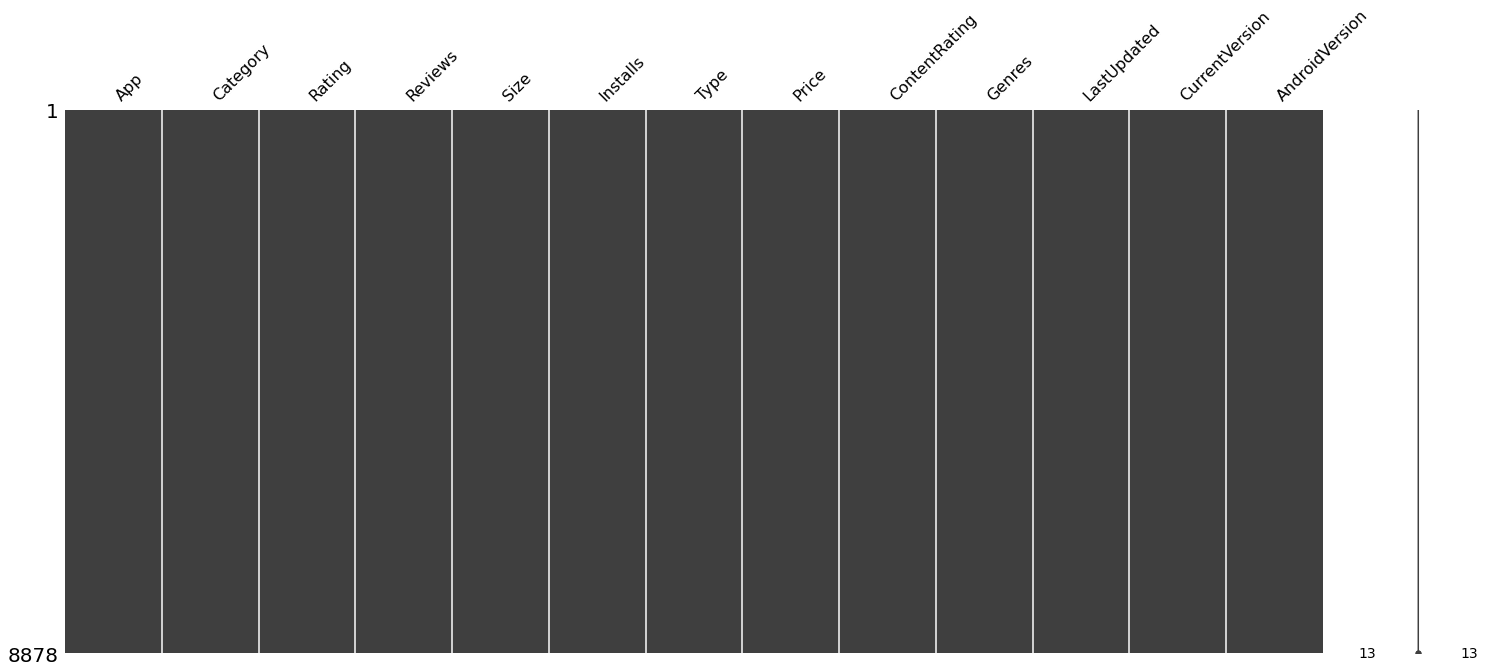

In [38]:
# The matrix below shows the nan values in each of the feature of the data
# The horizontal white line in each columns represents the nan value
msno.matrix(df1cleaning)

In [39]:
df1cleaning[df1cleaning.duplicated('App')].shape[0]

688

even after removing null values from above dataset , there are 688 records of duplicate apps but we will keep them as they may have different versions or other attributes.

In [40]:
#Ensuring there are no longer missing values
df1cleaning.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
ContentRating     False
Genres            False
LastUpdated       False
CurrentVersion    False
AndroidVersion    False
dtype: bool

In [41]:
#Again check for the shape of new formed data frame
df1cleaning.shape

(8878, 13)

In [42]:
df1cleaning['Reviews'].value_counts(dropna = False)

2          82
3          76
5          74
4          74
1          67
           ..
5282558     1
654418      1
251951      1
847159      1
398307      1
Name: Reviews, Length: 5990, dtype: int64

In [43]:
df1cleaning['Reviews']= df1cleaning['Reviews'].astype(float)

In [44]:
df1cleaning['Rating'].value_counts(dropna = False)

4.4    1030
4.3    1016
4.5     975
4.2     885
4.6     767
4.1     655
4.0     538
4.7     482
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [45]:
df1cleaning['CurrentVersion'].value_counts(dropna=False)

Varies with device    1258
1.0                    451
1.1                    190
1.2                    126
2.0                    117
                      ... 
2.32                     1
1.9.7.07                 1
6.07                     1
4.8.3                    1
0.3.4                    1
Name: CurrentVersion, Length: 2638, dtype: int64

In [46]:
df1cleaning['Category'].value_counts(dropna=False)

FAMILY                 1711
GAME                   1074
TOOLS                   732
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                201
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

there are lots of categories. At a later stage , we will frequency encode

In [47]:
df1cleaning['AndroidVersion'].value_counts(dropna=False)

4.1 and up            1983
4.0.3 and up          1196
Varies with device    1178
4.0 and up            1091
4.4 and up             788
2.3 and up             573
5.0 and up             480
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: AndroidVersion, dtype: int64

there are lots of outliers and misinformation like android x + and up , we are going to group the data together for the values which has less count and also remove the subversions in some of these sections.

In [48]:
# We can possibly clean this up and use it as one of the features            
def split_it(x):
    non_decimal = re.compile(r'[^\d.]+')
    return non_decimal.sub('', x)
            
df1cleaning['Android'] = df1cleaning['AndroidVersion'].apply(split_it)

In [49]:
def clean_it(x):
    clean = re.compile('\W+')
    return clean.sub('',x)

In [50]:
df1cleaning['Android'].value_counts(dropna = False)

4.1           1983
4.0.3         1196
              1178
4.0           1091
4.4            793
2.3            573
5.0            480
4.2            330
2.3.3          238
3.0            207
2.2            203
4.3            199
2.1            112
1.6             87
6.0             46
7.0             41
3.2             31
2.0             27
5.1             16
1.5             15
3.1              8
2.0.1            7
8.0              5
7.1              3
4.0.37.1.1       2
5.08.0           2
1.0              2
7.07.1.1         1
4.17.1.1         1
5.06.0           1
Name: Android, dtype: int64

In [51]:
conditions = [
    (df1cleaning['Android'] == "1.0" ) | (df1cleaning['Android'] == "1.6" ) | (df1cleaning['Android'] == "1.5" ),
    
    (df1cleaning['Android'] == "2.0.1" ) | (df1cleaning['Android'] == "2.3" ) |(df1cleaning['Android'] == "2.3.3" ) |
    (df1cleaning['Android'] == "2.1" ) | (df1cleaning['Android'] == "2.2" ) | (df1cleaning['Android'] == "2.0" ),
    
    (df1cleaning['Android'] == "3.0" ) | (df1cleaning['Android'] == "3.1" ) | (df1cleaning['Android'] == "3.2" ),
    
    (df1cleaning['Android'] == "8.0" ) | (df1cleaning['Android'] == "7.1" ) | (df1cleaning['Android'] == "4.0.37.1.1" )|
    (df1cleaning['Android'] == "5.08.0" ) | (df1cleaning['Android'] == "7.07.1.1" ) | (df1cleaning['Android'] == "4.17.1.1" )|
    (df1cleaning['Android'] == "5.06.0" ) | (df1cleaning['Android'] == "5.1" ), 
    
    (df1cleaning['Android'] == "" ) 
    
    ]

choices = ['1','2','3', 'Other', np.nan]
df1cleaning['Android_ver_final'] = np.select(conditions, choices, default= df1cleaning['Android'])

In [52]:
df1cleaning['Android_ver_final'].value_counts(dropna = False)

4.1      1983
4.0.3    1196
NaN      1178
2        1160
4.0      1091
4.4       793
5.0       480
4.2       330
3         246
4.3       199
1         104
6.0        46
7.0        41
Other      31
Name: Android_ver_final, dtype: int64

In [53]:
print(df1cleaning['Size'].str.replace('\d+', '').unique())

['M' '.M' 'Varies with device' 'k' '.k']


From above , we can see that our sizes are in different measures

In [54]:
# converting mb to kb

def convert_mb_kb(df1cleaning):
    df1cleaning.loc[df1cleaning['Size'].str.contains('M'),'Size'] = df1cleaning.loc[df1cleaning['Size'].str.contains('M'),'Size'].str.rstrip('M').astype(float) * 1024

convert_mb_kb(df1cleaning)

In [55]:
# Lets look at all our unique letters now

print(df1cleaning['Size'].astype(str).str.replace('\d+', '').unique())

['.' 'Varies with device' 'k' '.k']


In [56]:
#Removing K
df1cleaning.loc[df1cleaning['Size'].astype(str).str.contains('K'), 'Size'] = df1cleaning.loc[df1cleaning['Size'].astype(str).str.contains('K'), 'Size'].str.replace('K', '')

In [57]:
# replace varies with device

df1cleaning['Size'].replace('VARIES WITH DEVICE', np.nan, inplace=True)

In [58]:
# remove the "+"

def remove_plus(df1cleaning, col):
    df1cleaning[col] = df1cleaning[col].astype(str).str.replace('+', '', regex=False)

remove_plus(df1cleaning, 'Size')

In [59]:
# removing commas

def remove_commas(df1cleaning, col):
    df1cleaning[col] = df1cleaning[col].str.replace(',', '')

remove_commas(df1cleaning, 'Size')

In [60]:


# convert column size data type to numeric

def convert_to_numeric(df1cleaning, col):
    df1cleaning[col] = pd.to_numeric(df1cleaning[col], errors='coerce')

convert_to_numeric(df1cleaning, 'Size')



To deal with missing values , lets replace them with mean

In [61]:
df1cleaning['Size'] = df1cleaning['Size'].astype(float).fillna(df1cleaning.groupby('Category')['Size'].transform('mean'))

In [62]:
df1cleaning.describe()

,Rating,Reviews,Size
count,8878.000000,8.878000e+03,8878.000000
mean,4.187745,4.729619e+05,23391.196529
std,0.522572,2.906987e+06,21996.855340
min,1.000000,1.000000e+00,1024.000000
25%,4.000000,1.640000e+02,7475.200000
50%,4.300000,4.708000e+03,16384.000000
75%,4.500000,7.119725e+04,30878.873960
max,5.000000,7.815831e+07,102400.000000


Mean for last updated is 2017.4

In [63]:
df1cleaning.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVersion',
       'AndroidVersion', 'Android', 'Android_ver_final'],
      dtype='object')

In [64]:
df1cleaning['LastUpdated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [65]:
#Removing everything before comma to get only the year

def convert_datetime(df1cleaning, col):
    df1cleaning[col] = pd.to_datetime(df1cleaning[col])
    
def extract_year_dt(df1cleaning, col):
    df1cleaning[col] = df1cleaning[col].dt.year
    
    
convert_datetime(df1cleaning, 'LastUpdated')
extract_year_dt(df1cleaning, 'LastUpdated')

In [66]:
# check

print(df1cleaning['LastUpdated'])

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10834    2017
10836    2017
10837    2018
10839    2015
10840    2018
Name: LastUpdated, Length: 8878, dtype: int64


In [67]:
df1cleaning['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

removing dollar sign from price data and then converting the data type to float

In [68]:
df1cleaning['Price'] = df1cleaning['Price'].map(lambda x : x.lstrip('$'))

In [69]:
df1cleaning['Price']=df1cleaning['Price'].astype('float')

In [70]:
df1cleaning['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [71]:
df1cleaning['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

removing + sign from install and converting it as numerical data

In [72]:
df1cleaning['Installs']= df1cleaning['Installs'].map(lambda x : x.rstrip('+'))

In [73]:
df1cleaning['Installs']=df1cleaning['Installs'].map(lambda x: ''.join(x.split(',')))

In [74]:
df1cleaning['Installs']=df1cleaning['Installs'].astype(int)
df1cleaning['Installs'].dtype

dtype('int32')

In [75]:
df1cleaning['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [76]:
df1cleaning['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Fr. Mike Schmitz Audio Teachings',
       'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

## Data Visualization

In [77]:
df1visual = df1cleaning.copy(deep=True)

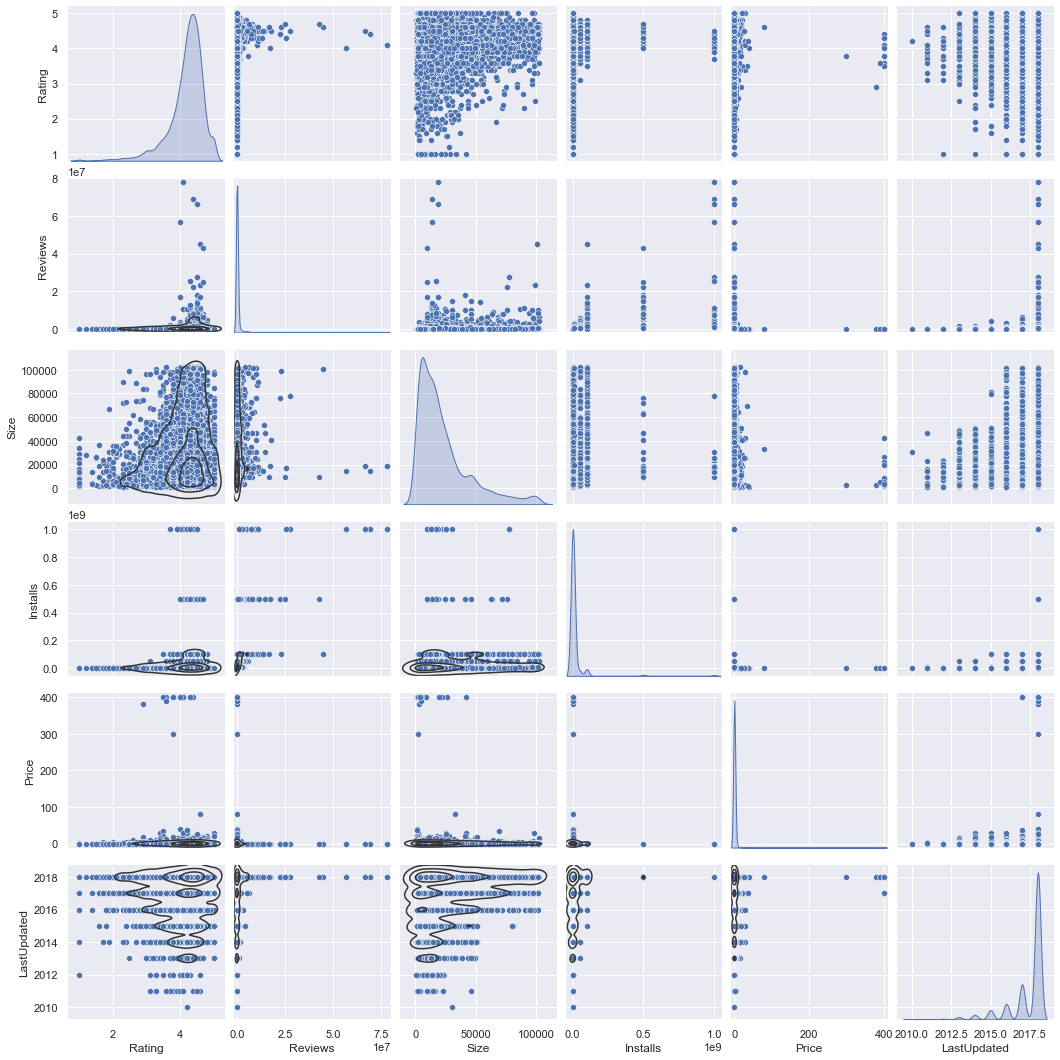

In [135]:
g = sns.pairplot(df1visual, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [78]:
#customize plots and show map denisty
#g = sns.pairplot(df1visual, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

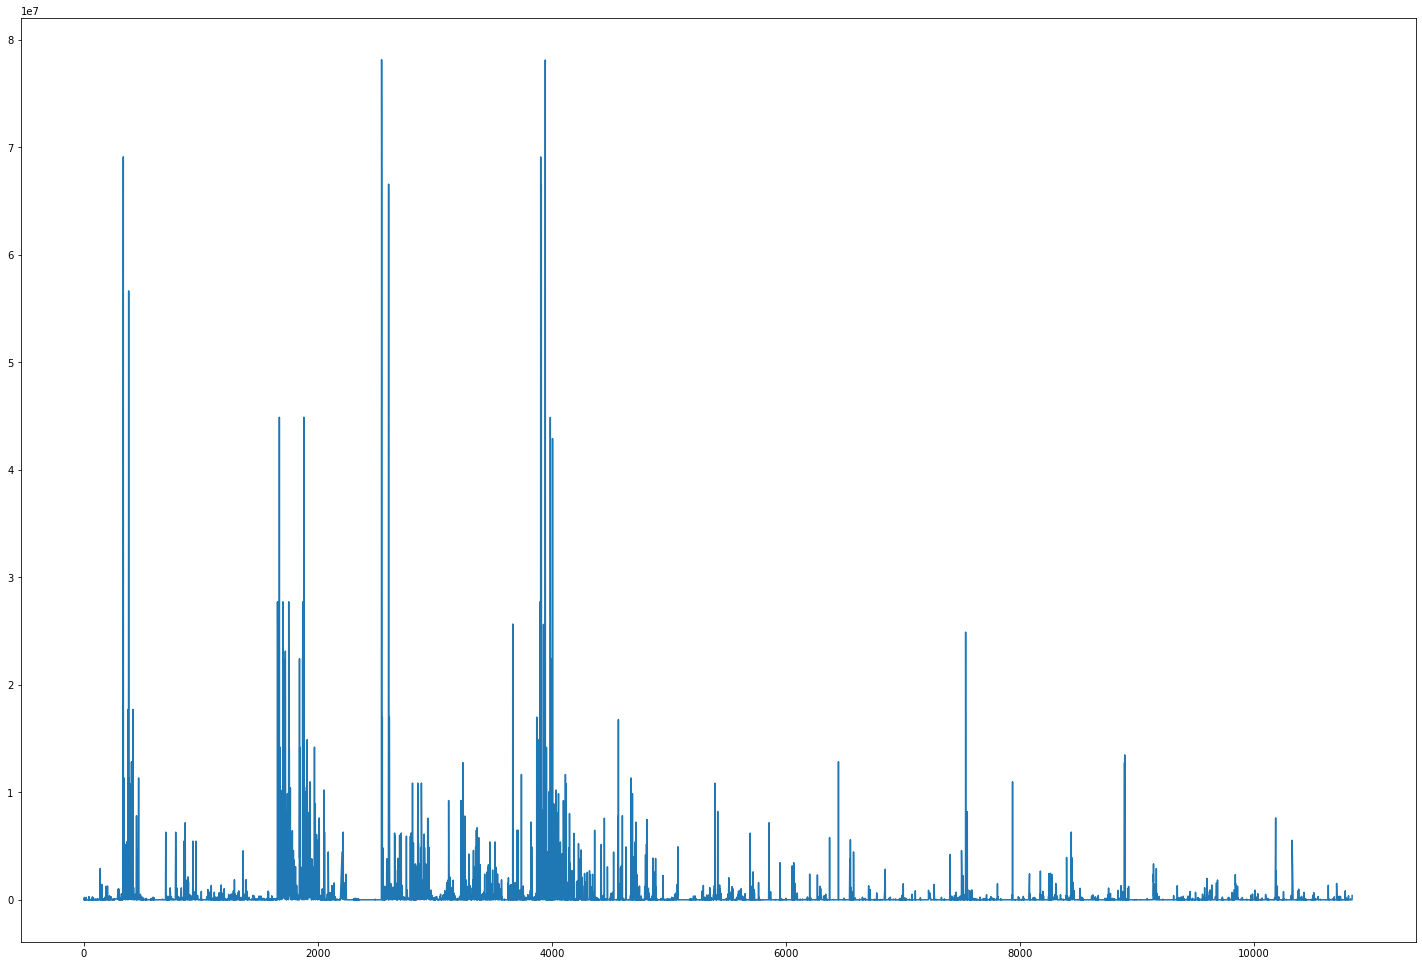

In [79]:
plt.figure(figsize=(25,17))
plt.plot(df1visual['Reviews'])

Text(0.5, 1.0, 'Distribution of Reviews')

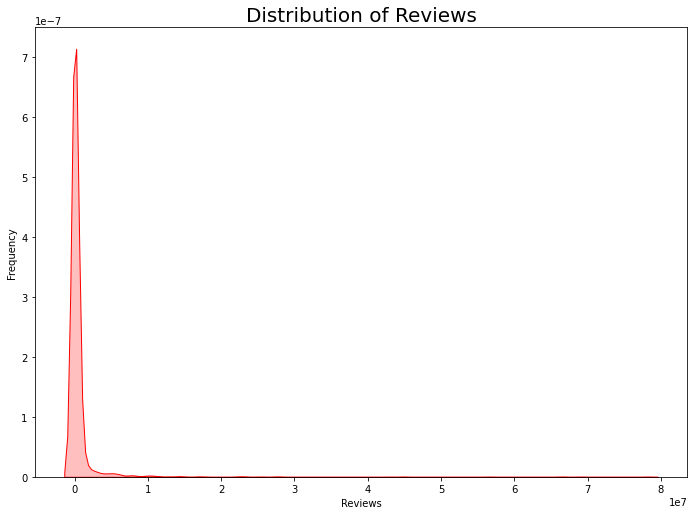

In [80]:
# rating distibution 
mlt.rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df1visual.Reviews, color="Red", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reviews',size = 20)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

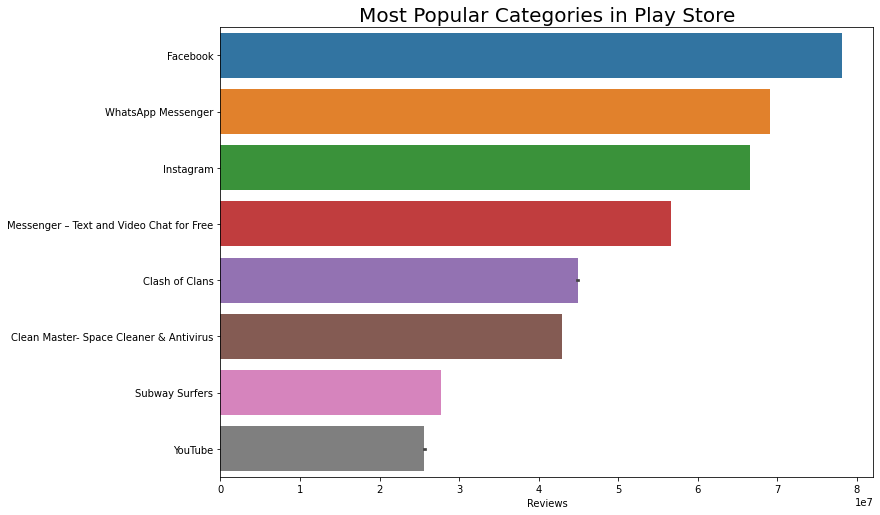

In [81]:
## most reviewed apps
sorte = df1visual.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = sorte )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

Most popular App in play store is Facebook followed by WhatsApp.

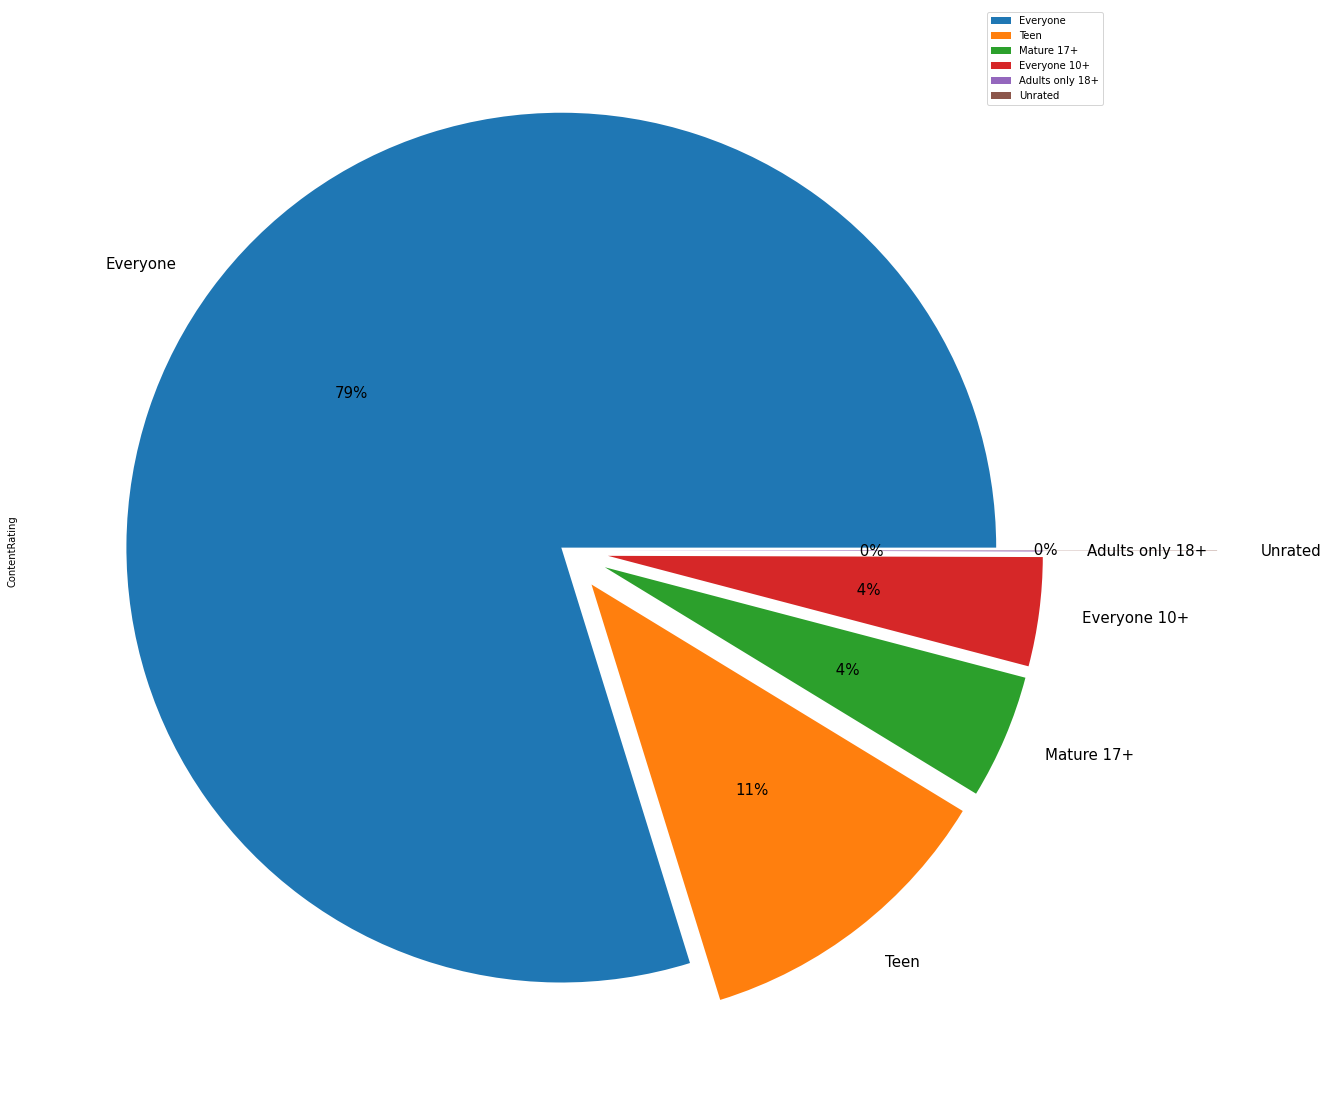

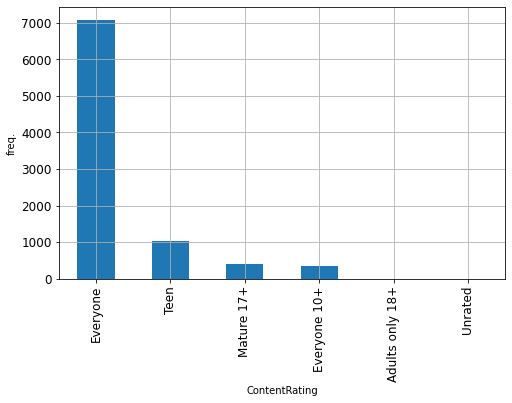

In [82]:
#  Content Rating 
plt.figure(figsize=(30,20))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
df1visual['ContentRating'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode,fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
df1visual['ContentRating'].value_counts().plot(kind='bar', fontsize=12)
plt.xlabel('ContentRating')
plt.ylabel('freq.')

plt.grid()
plt.show()

People prefer family-oriented app which is made for everyone over adult only or teen apps.

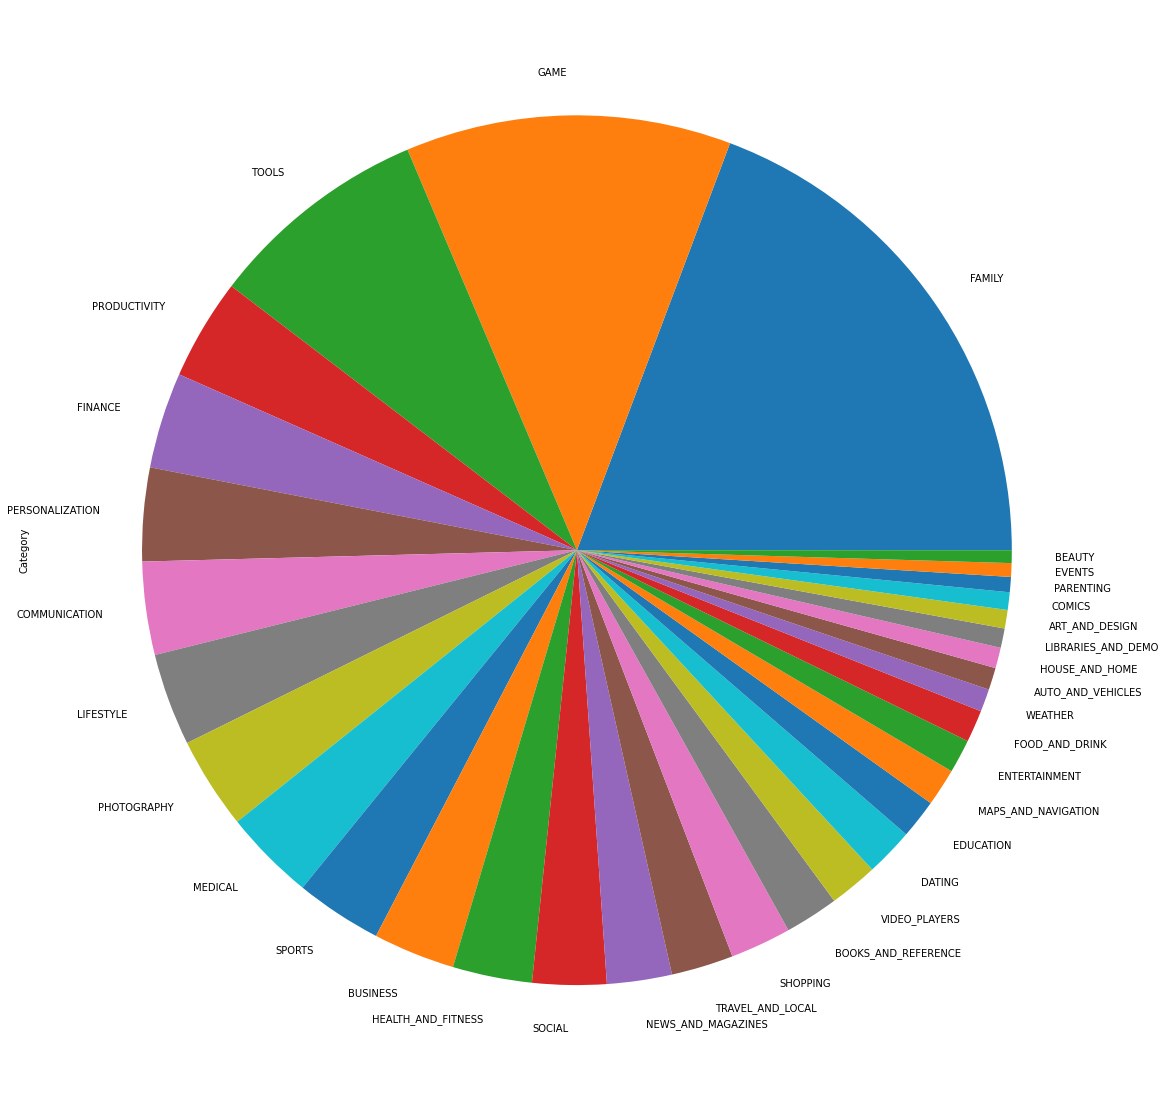

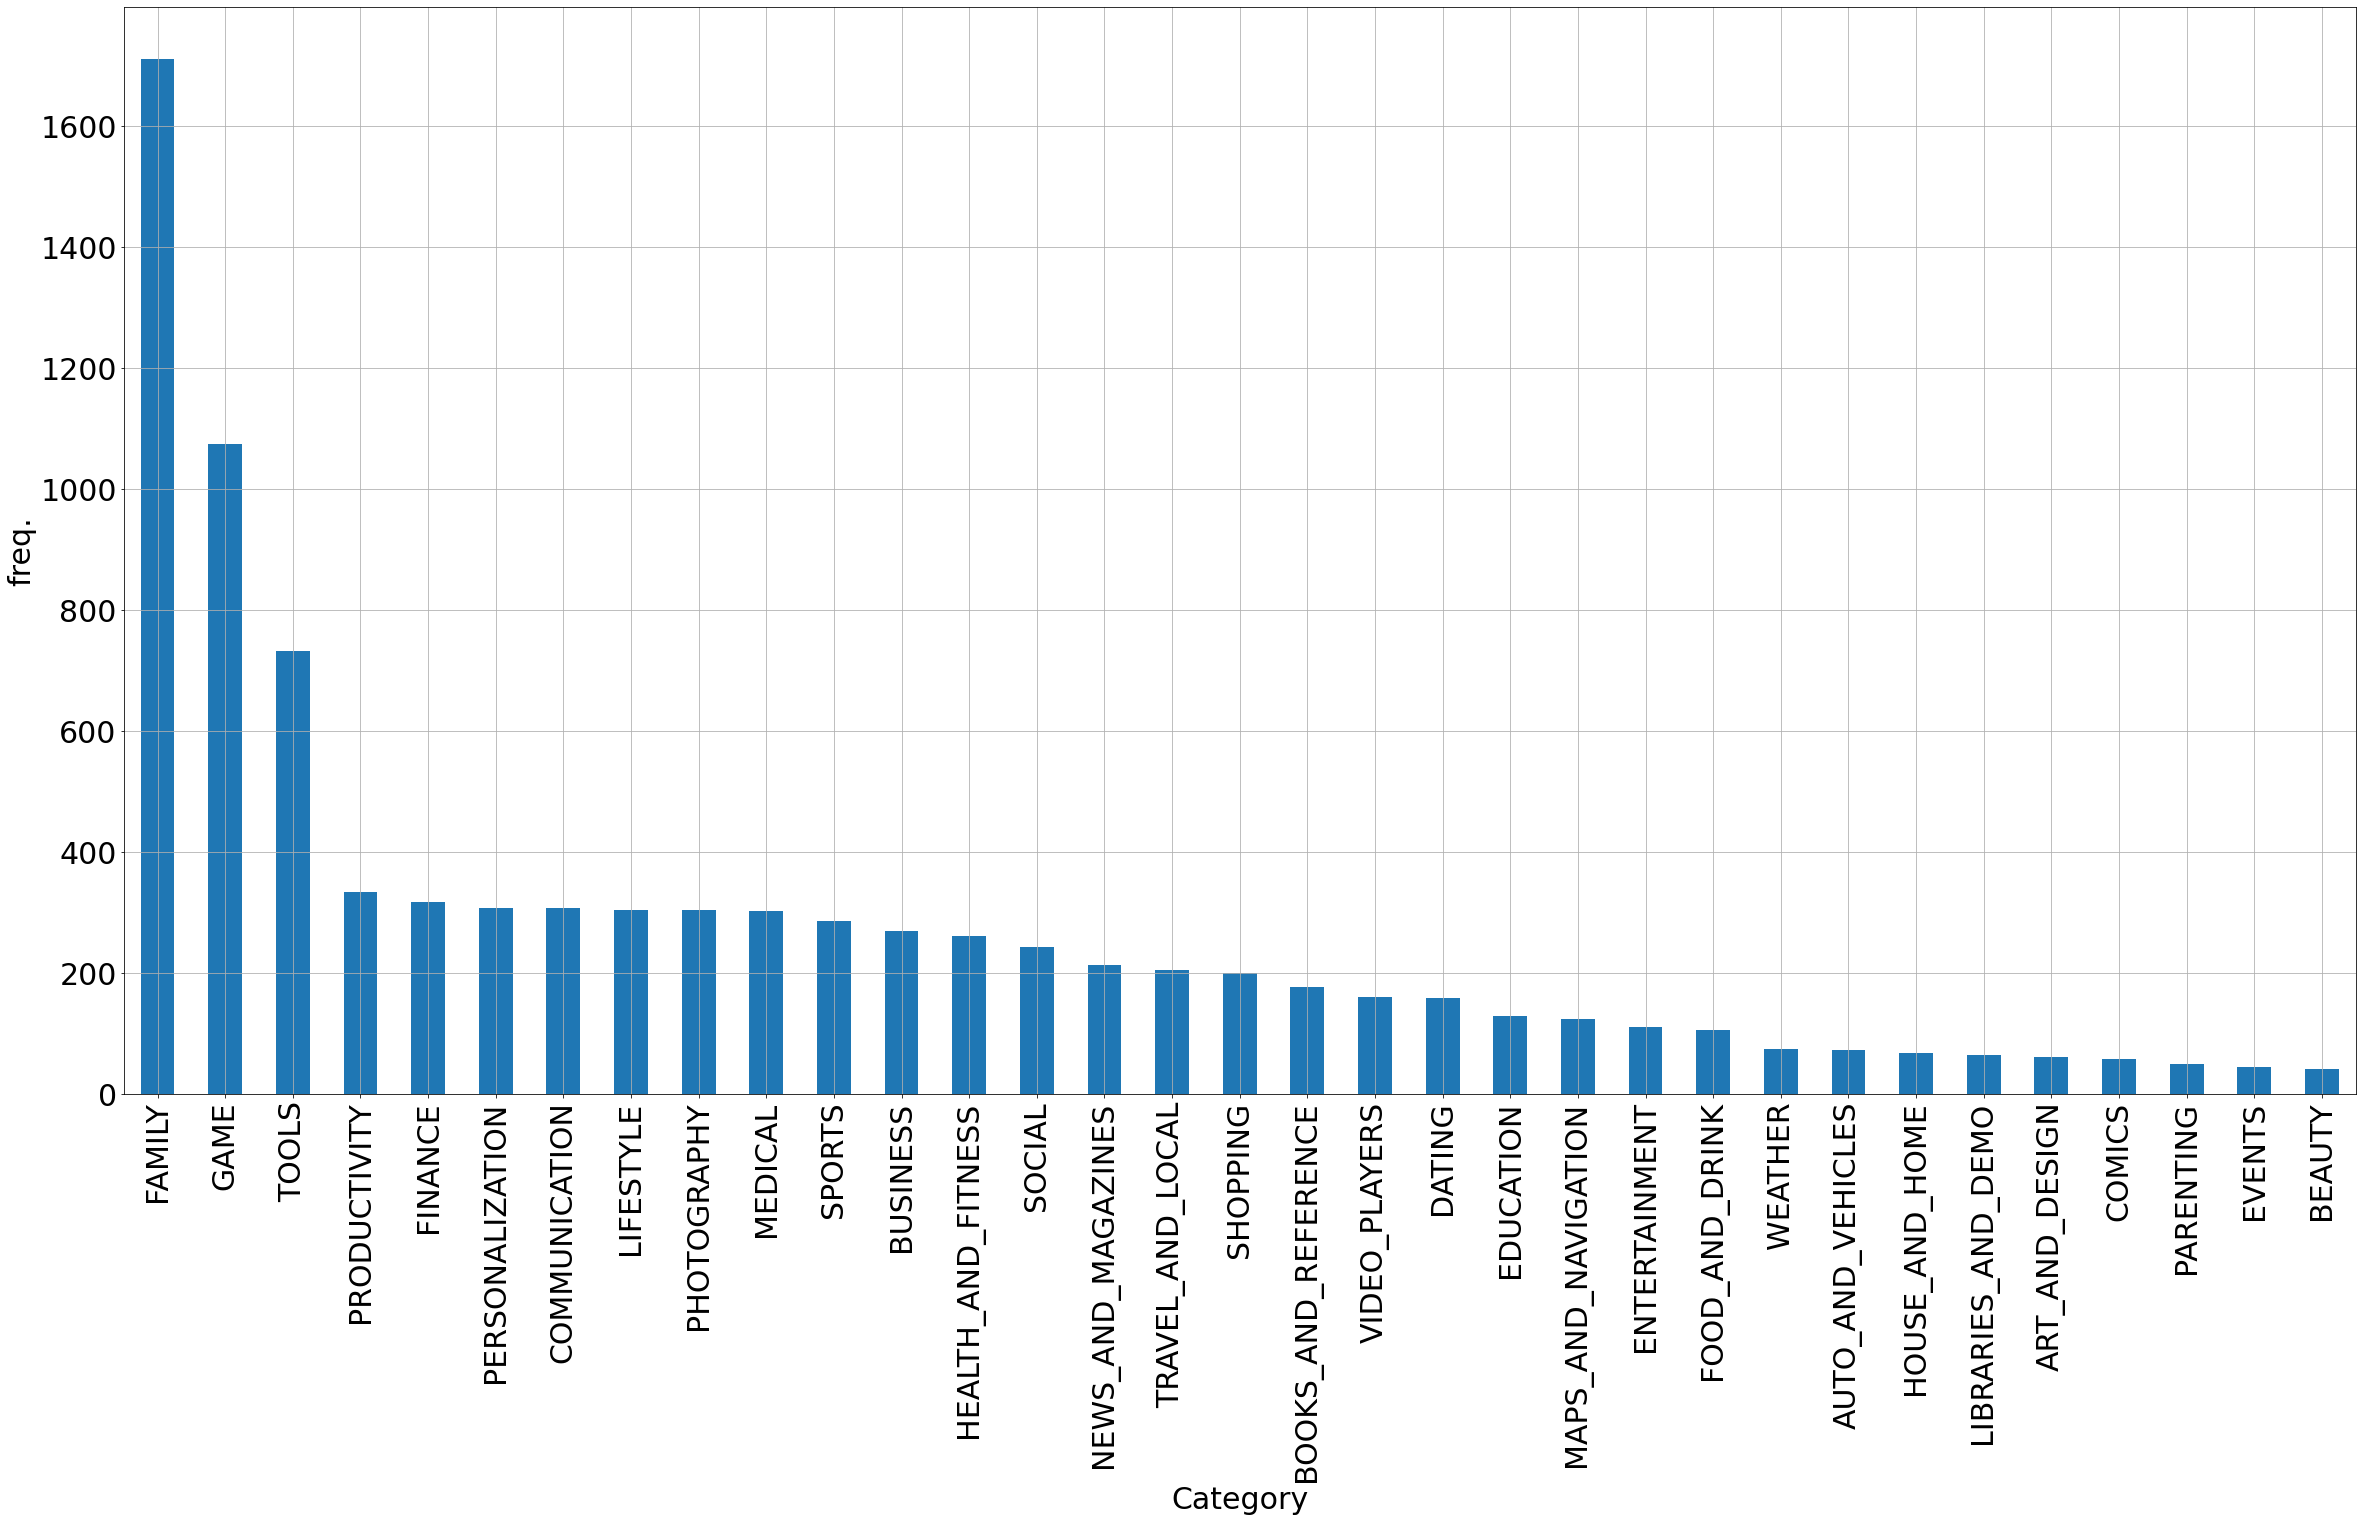

In [83]:
# most Most popular category
plt.figure(figsize=(40,20))
df1visual['Category'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(40,20))
df1visual['Category'].value_counts().plot(kind='bar' ,fontsize=30)
plt.xlabel('Category',fontsize=30)
plt.ylabel('freq.',fontsize=30)
plt.grid()
plt.show()

From category perspective family-oriented apps were the clear winners with least popularity for beauty and event apps.

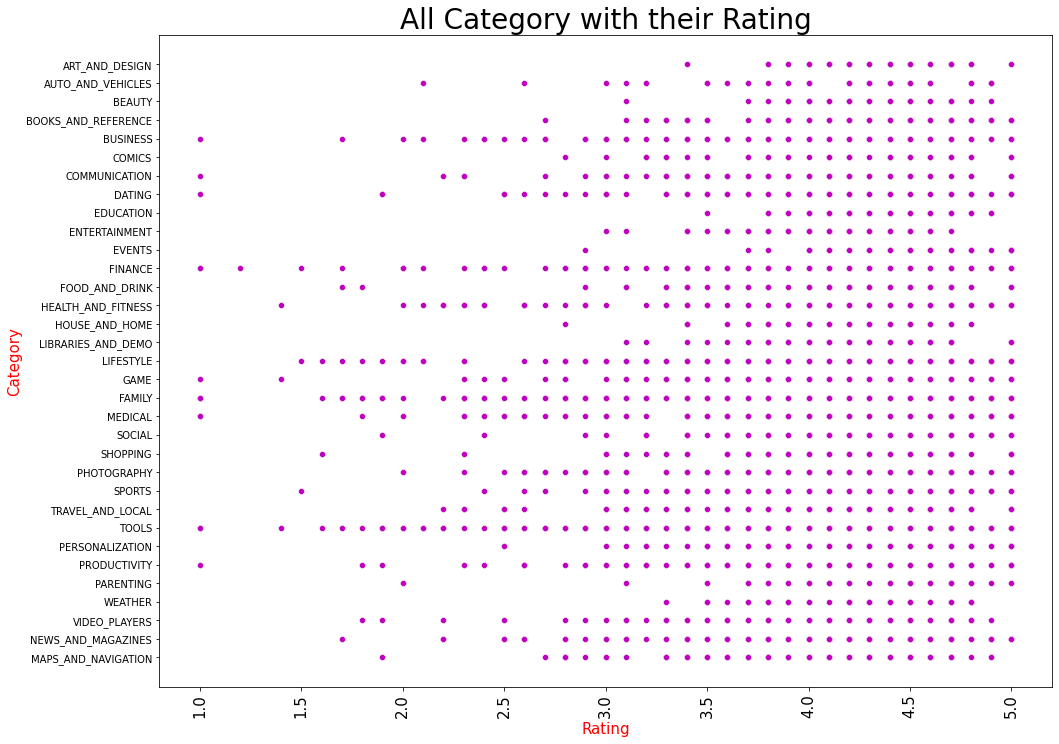

In [84]:
plt.figure(figsize=(16,12)) 
sns.scatterplot(data=df1visual,y="Category",x='Rating',color="m")
plt.xticks(rotation='vertical',size=15)
plt.xlabel("Rating",size=15,c="r")
plt.ylabel("Category",size=15,c="r")
plt.title("All Category with their Rating",size=28,c="k")
plt.show()

In categories vs reviews visualization, the reviews are scattered all over the graph though categories like house and home and dating app have reviews starting from 3.5 which is very good considering these 2 categories were not part of the popularity list.

<Figure size 3600x3600 with 0 Axes>

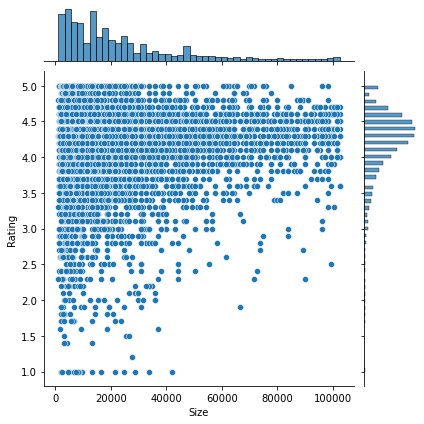

In [85]:
plt.figure(figsize=(50, 50))
sns.jointplot(data=df1visual, x='Size', y='Rating');

This graph suggests that apps with a lower size have more varied rating. Meaning that as we increase in size, the ratings count tends to fall less and less.

<Figure size 3600x3600 with 0 Axes>

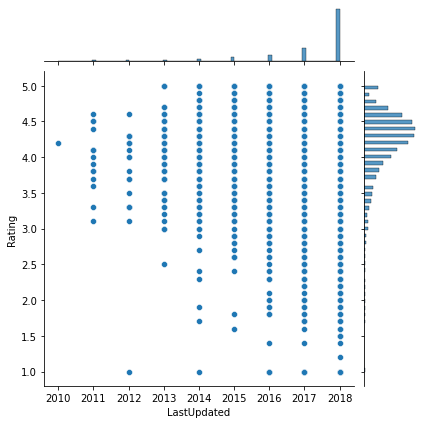

In [86]:
plt.figure(figsize=(50, 50))
sns.jointplot(data=df1visual, x='LastUpdated', y='Rating')

There seems to be more variation in rating in apps that have been updated more recently.

<AxesSubplot:xlabel='LastUpdated', ylabel='Installs'>

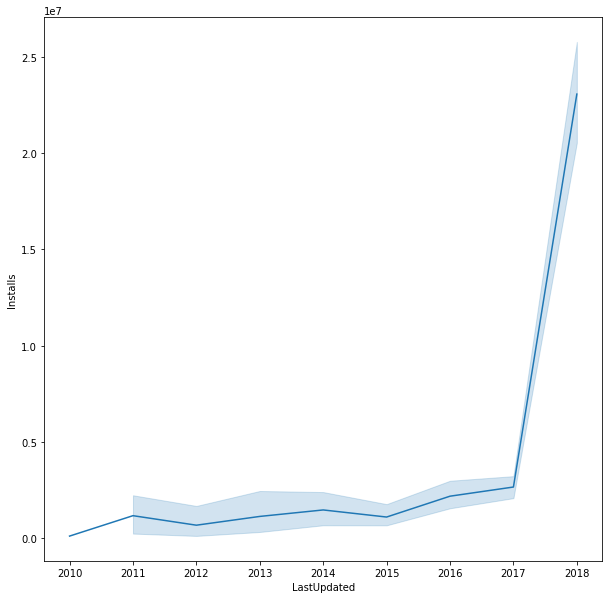

In [87]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df1visual, x='LastUpdated', y='Installs')

It seems that the last updated does impact the rating as in the above graph the installs are more for the recently updated apps

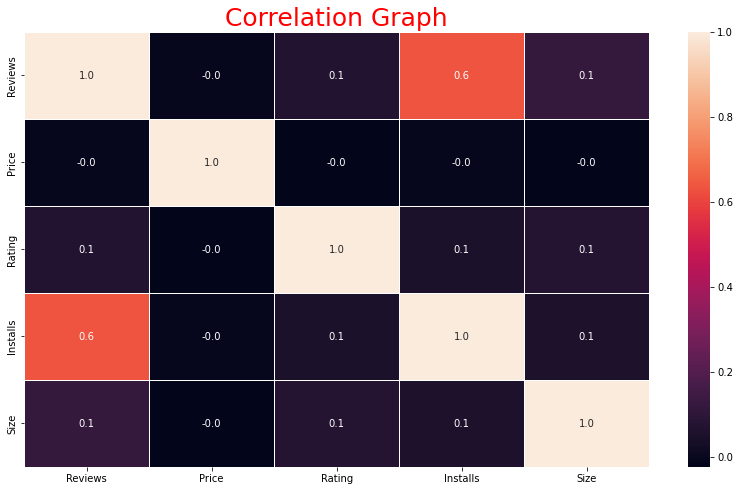

In [88]:
plt.figure(figsize=(14,8))
sns.heatmap(df1visual[["Reviews","Price","Rating","Installs","Size"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

    --As seen here with heatmap, reviews and Installs has good relation
    --More the Reviews more the installation no of apps, means users see review and total installtaion before installling
    --There is no relation of no of installation & Reviews with price

reference : https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [89]:
df1visualgroup = df1visual.groupby('Category', as_index=False).agg({'App': pd.Series.count, 'Installs': pd.Series.sum})
df1visualgroup

,Category,App,Installs
0,ART_AND_DESIGN,61,124228100
1,AUTO_AND_VEHICLES,73,53129800
2,BEAUTY,42,26916200
3,BOOKS_AND_REFERENCE,177,1916291655
4,BUSINESS,270,863518120
5,COMICS,58,56036100
6,COMMUNICATION,307,24152241530
7,DATING,159,206522410
8,EDUCATION,129,533852000
9,ENTERTAINMENT,111,2455660000


In [90]:
plt.figure(figsize=(50, 30))

scatter = px.scatter(df1visualgroup,
                     x='App',
                     y='Installs', 
                     title='Category Concentration',
                     size='App',
                     hover_name=df1visualgroup['Category'],
                     color='Installs',
                    width=1000, height=800)
scatter.update_layout(xaxis_title='Number of Apps',
                      yaxis_title='Installs',
                      yaxis=dict(type='log'),
                       paper_bgcolor="peachpuff")
scatter.update_layout(title_text='Category Concentration', title_x=0.5)
scatter.show()

<Figure size 3600x2160 with 0 Axes>

In [91]:
df1visualgroup1 = df1visual.groupby('Genres', as_index=False).agg({'App': pd.Series.count, 'Installs': pd.Series.sum})
df1visualgroup1

,Genres,App,Installs
0,Action,349,8336037470
1,Action;Action & Adventure,15,73020500
2,Adventure,73,406695300
3,Adventure;Action & Adventure,12,806150000
4,Adventure;Brain Games,1,100000
...,...,...,...
110,Video Players & Editors,158,6206897200
111,Video Players & Editors;Creativity,2,10000000
112,Video Players & Editors;Music & Video,3,25000000
113,Weather,75,426096500


In [92]:
scatter_1 = px.scatter(df1visualgroup1,
                     x='App',
                     y='Installs', 
                     title='Genres Concentration',
                     size='App',
                     hover_name=df1visualgroup1['Genres'],
                     color='Installs',
                      width=1000, height=800)
scatter_1.update_layout(xaxis_title='Number of Apps',
                      yaxis_title='Installs',
                      yaxis=dict(type='log'),
                       paper_bgcolor="peachpuff")
scatter_1.update_layout(title_text='Genres Concentration', title_x=0.5)
scatter_1.show()

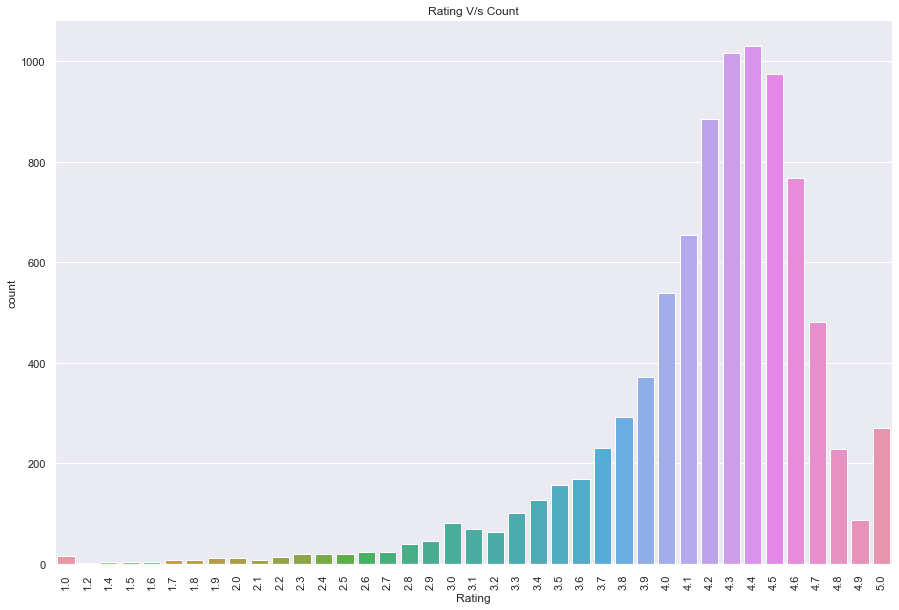

In [93]:
# Count plot for rating
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
#dat = sns.load_dataset("df")
plt.xticks(rotation=90)
plt.title("Rating V/s Count")
ax = sns.countplot(x="Rating", data=df1visual)

The count of rating shows an interesting pattern where people have given a higher ratings to most of the apps. Which also says that the apps with lower rating must be having some serious issues.


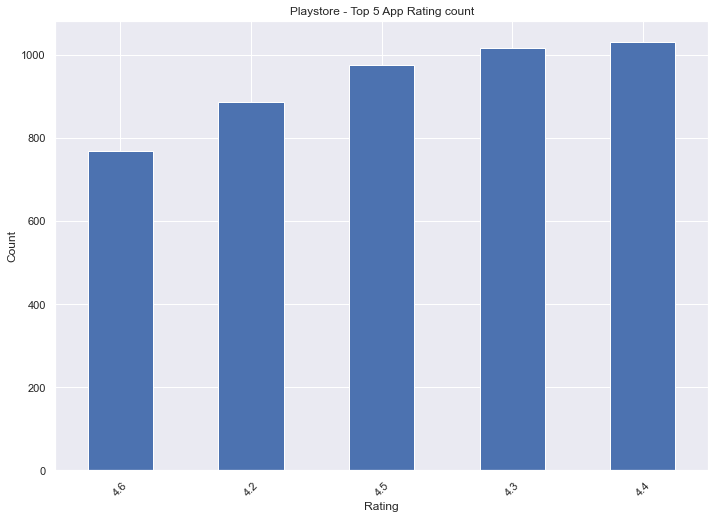

In [94]:
#Top five value counts  for rating 
df1visual["Rating"].value_counts().nlargest(5).sort_values(ascending=True).plot.bar()
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)

plt.show()

# Trim outliers

The first quartile is 4.0. 
The third quartile is 4.5. 
The IQR is 0.5.
The mean is 4.19.
The standard deviation is 0.52.
The median is 4.3.


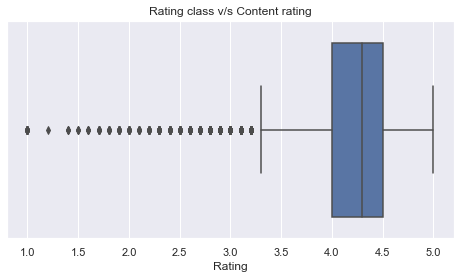

In [95]:
#Boxplot of age WITH outliers
figure1 = plt.figure(figsize = (8,4))
plt.title ('Rating class v/s Content rating')
sns.boxplot(x = df1visual['Rating'])

#IQR
Q1 = df1visual['Rating'].quantile(0.25)
Q3 = df1visual['Rating'].quantile(0.75)
IQR = Q3-Q1

mean1 = round(df1visual['Rating'].mean(),2)
std1 = round(df1visual['Rating'].std(),2)
median1 = round(df1visual['Rating'].median(),2)
print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%IQR)
print('The mean is %s.'%mean1)
print('The standard deviation is %s.'%std1)
print('The median is %s.'%median1)

There are multiple out liers that will be trimed off.

The mean is 4.19.
The standard deviation is 0.52.
The median is 4.3.


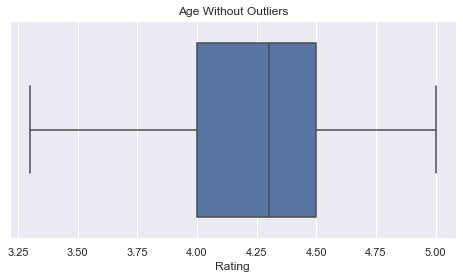

In [96]:
#Boxplot of age WITHOUT outliers
figure1 = plt.figure(figsize = (8,4))
plt.title ('Age Without Outliers')
sns.boxplot(x = df1visual['Rating'], showfliers=False)
mean1 = round(df1visual['Rating'].mean(),2)
std1 = round(df1visual['Rating'].std(),2)
median1 = round(df1visual['Rating'].median(),2)
print('The mean is %s.'%mean1)
print('The standard deviation is %s.'%std1)
print('The median is %s.'%median1)

In [97]:
# save cuted rows
df1visual['Rating'] = df1visual['Rating']

In [98]:
df1visual['Genres'].value_counts(dropna=False)

Tools                          731
Entertainment                  497
Education                      445
Action                         349
Productivity                   334
                              ... 
Casual;Music & Video             1
Board;Pretend Play               1
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Creativity              1
Name: Genres, Length: 115, dtype: int64

## Data Processing

In [99]:
df1processed = df1visual.copy(deep=True)

In [100]:
df1processed.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVersion,AndroidVersion,Android,Android_ver_final
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000,Free,0.0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up,4.0.3,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3 and up,4.0.3,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up,4.0.3,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25600.0,50000000,Free,0.0,Teen,Art & Design,2018,Varies with device,4.2 and up,4.2,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018,1.1,4.4 and up,4.4,4.4


In [101]:
def freq_encode(x):
    df_frequency_map = df1processed[x].value_counts().to_dict()
    df1processed[x] = df1processed[x].map(df_frequency_map)

In [102]:
freq_encode('Category')

In [103]:
df1processed['Category'].value_counts(dropna=False)

1711    1711
1074    1074
732      732
334      334
317      317
308      308
307      307
305      305
304      304
302      302
286      286
270      270
262      262
244      244
214      214
205      205
201      201
177      177
160      160
159      159
129      129
124      124
111      111
106      106
75        75
73        73
68        68
64        64
61        61
58        58
50        50
45        45
42        42
Name: Category, dtype: int64

In [104]:
df1processed['Genres'].value_counts(normalize=True).loc[lambda x : x>0.02]

Tools               0.082338
Entertainment       0.055981
Education           0.050124
Action              0.039311
Productivity        0.037621
Finance             0.035706
Personalization     0.034692
Communication       0.034580
Lifestyle           0.034242
Photography         0.034242
Medical             0.034017
Sports              0.033679
Business            0.030412
Health & Fitness    0.029511
Social              0.027484
News & Magazines    0.024105
Arcade              0.023091
Travel & Local      0.022978
Shopping            0.022640
Simulation          0.021739
Casual              0.020613
Name: Genres, dtype: float64

In [105]:
freq_encode("Genres")

In [106]:
df1processed['Genres'].value_counts(normalize=True).loc[lambda x : x>0.02]

731    0.082338
304    0.068484
497    0.055981
445    0.050124
349    0.039311
334    0.037621
317    0.035706
308    0.034692
307    0.034580
302    0.034017
299    0.033679
270    0.030412
262    0.029511
244    0.027484
214    0.024105
106    0.023879
205    0.023091
204    0.022978
201    0.022640
193    0.021739
183    0.020613
Name: Genres, dtype: float64

In [107]:
freq_encode("ContentRating")

In [108]:
df1processed['ContentRating'].value_counts(dropna=False)

7083    7083
1021    1021
411      411
359      359
3          3
1          1
Name: ContentRating, dtype: int64

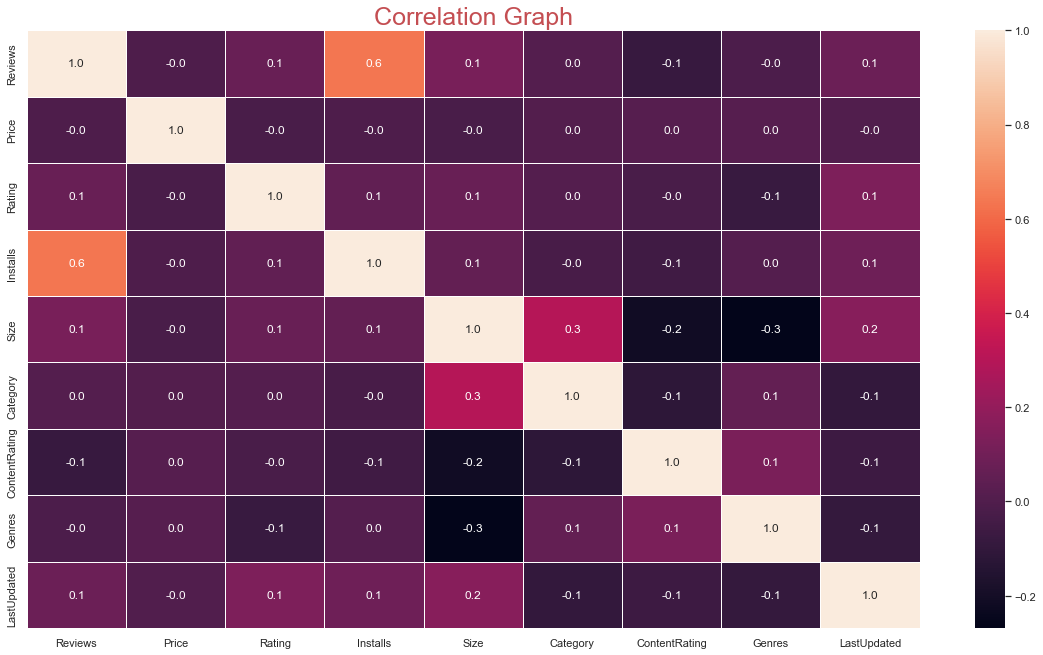

In [109]:
# plot heat map
plt.figure(figsize=(20,11))
sns.heatmap(df1processed[["Reviews","Price","Rating","Installs","Size", 'Type', 'Category', 'ContentRating', 'Genres', 'LastUpdated']].corr(), annot=True,linewidths=1,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

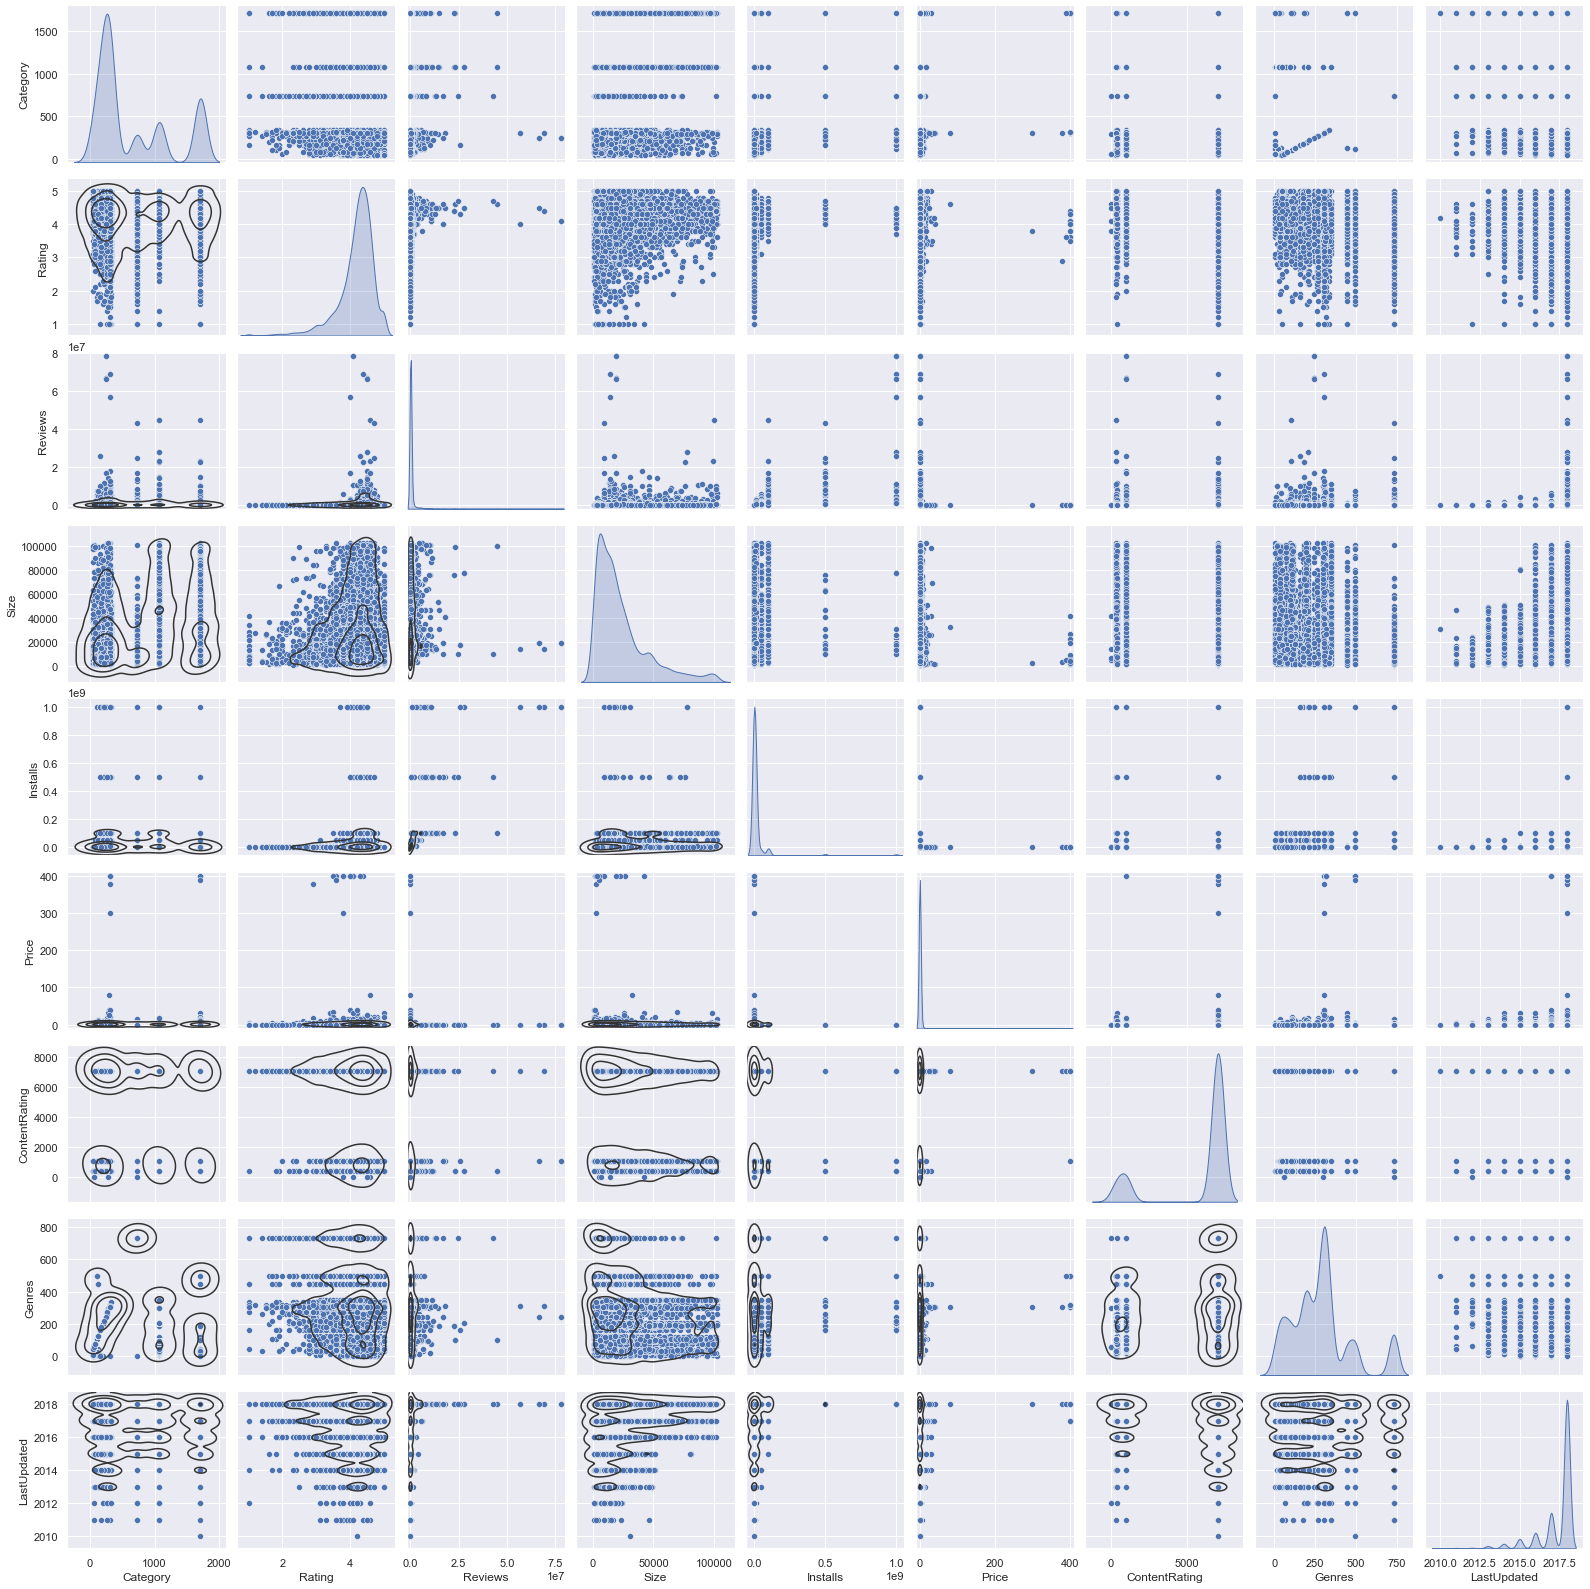

In [110]:
#customize plots and show map denisty
g = sns.pairplot(df1processed, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

## Data Modeling 

In [111]:
cols = ['Rating','Category','Size','Reviews','Android_ver_final','Installs','Price','ContentRating','Genres']

In [112]:
df1modeltemp = df1processed[cols]

In [113]:
df1model = df1modeltemp.dropna()

In [114]:
xindependent = ['Category','Size','Reviews','Android_ver_final','Installs','Price','ContentRating','Genres']
x = df1model[xindependent]
ytemp=df1model['Rating']
y = ytemp.astype(int)

In [115]:
df1model.corr()

,Rating,Category,Size,Reviews,Installs,Price,ContentRating,Genres
Rating,1.000000,0.026134,0.078388,0.085563,0.061535,-0.022334,-0.029555,-0.084464
Category,0.026134,1.000000,0.287381,0.069220,0.036328,0.001349,-0.131875,0.045190
Size,0.078388,0.287381,1.000000,0.237056,0.154620,-0.025763,-0.222875,-0.271954
Reviews,0.085563,0.069220,0.237056,1.000000,0.642417,-0.010543,-0.083034,-0.039555
Installs,0.061535,0.036328,0.154620,0.642417,1.000000,-0.011280,-0.056760,-0.021226
Price,-0.022334,0.001349,-0.025763,-0.010543,-0.011280,1.000000,0.015112,0.018050
ContentRating,-0.029555,-0.131875,-0.222875,-0.083034,-0.056760,0.015112,1.000000,0.127422
Genres,-0.084464,0.045190,-0.271954,-0.039555,-0.021226,0.018050,0.127422,1.000000


In [116]:
y.describe()

count    7700.000000
mean        3.760519
std         0.592677
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Rating, dtype: float64

In [117]:
x.describe()

,Category,Size,Reviews,Installs,Price,ContentRating,Genres
count,7700.000000,7700.000000,7.700000e+03,7.700000e+03,7700.000000,7700.000000,7700.000000
mean,702.260519,23973.620081,3.016967e+05,8.627268e+06,1.078855,5829.504156,281.992078
std,603.370773,23316.459792,1.763664e+06,4.731929e+07,17.389313,2528.501311,184.193836
min,42.000000,1024.000000,1.000000e+00,1.000000e+00,0.000000,1.000000,1.000000
25%,262.000000,6348.800000,1.107500e+02,1.000000e+04,0.000000,7083.000000,159.000000
50%,308.000000,15360.000000,2.398500e+03,1.000000e+05,0.000000,7083.000000,299.000000
75%,1074.000000,33792.000000,4.178600e+04,1.000000e+06,0.000000,7083.000000,334.000000
max,1711.000000,102400.000000,4.489389e+07,1.000000e+09,400.000000,7083.000000,731.000000


ML Pipeline

In [118]:
ohe = OneHotEncoder(handle_unknown='ignore')
oe = OrdinalEncoder()
scaler = StandardScaler()
regr = LinearRegression()
logreg = LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=1)
#,max_iter=5000

in above scenario solver lbfgs failed with max_iter 100, 500  and 1000. when changed to 5000. it was not able to fit the data even in 5000 so tried
newton-cg and sag out of which sag and saga was faster than newton-cg.   
Doc reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [119]:
## One HOT Encoding for all categorical variables 
catcol = make_column_transformer(
    (ohe, ['Category', 'ContentRating','Genres']),
    (oe,['Android_ver_final']),
    (scaler, ['Size','Installs','Reviews']),
    remainder='passthrough')

In [120]:
## Pipeline for Linear Regression problem

pipe = make_pipeline(catcol, regr)

In [121]:
## Pipeline for Logistic Regression Classification problem

pipe_LR = make_pipeline(catcol, logreg)
pipe_LR.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'ContentRating',
                                                   'Genres']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Android_ver_final']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Size', 'Installs',
                                                   'Reviews'])])),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial', random_state=1,


Cross validation of Logistic Regression

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cross_val_score(pipe_LR, x, y, cv=cv, scoring='accuracy').mean()

0.7329004329004327

CV : RepeatedStratifiedKFold -- Repeats Stratified K-Fold n times with different randomization in each repetition,  
Provides train/test indices to split data in train/test sets.

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cross_val_score(pipe_LR, x, y, cv=cv, scoring='accuracy')

array([0.73376623, 0.73376623, 0.73376623, 0.72987013, 0.73246753,
       0.73116883, 0.73506494, 0.73246753, 0.73376623, 0.73246753,
       0.73376623, 0.73376623, 0.73506494, 0.73116883, 0.73246753,
       0.73246753, 0.73506494, 0.73246753, 0.73246753, 0.72857143,
       0.73636364, 0.73376623, 0.73506494, 0.73246753, 0.73246753,
       0.73116883, 0.73376623, 0.73116883, 0.73246753, 0.73246753])

Result: Array of scores of the estimator for each run of the cross validation. the score shows the performance measure: accuracy

Linear Regression

In [124]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x, y, cv=5, scoring='r2')

array([-0.2725444 , -0.09062414,  0.00616188, -0.00409279, -0.0124509 ])

The Linear regression predictions are not that great. However, logistic regression provides a decent accuracy.  
So better to set it up as a classfication problem.

In [125]:
params = {}
params['logisticregression__penalty'] = ['l1', 'l2']
params['logisticregression__C'] = [0.1, 1, 10]
params

{'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__C': [0.1, 1, 10]}

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [126]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe_LR, params, cv=cv, scoring='accuracy')
grid.fit(x, y);

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packa

In [127]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
3,0.885133,0.058215,0.007200,0.000475,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.733766,0.733766,0.733766,...,0.732468,0.732468,0.731169,0.733766,0.731169,0.732468,0.732468,0.732900,0.001620,1
1,0.554997,0.098164,0.007601,0.001496,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.735065,0.732468,0.733766,...,0.732468,0.732468,0.732468,0.733766,0.731169,0.732468,0.732468,0.732857,0.001014,2
5,1.957362,0.243585,0.008535,0.005004,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.733766,0.733766,0.733766,...,0.732468,0.732468,0.728571,0.732468,0.729870,0.729870,0.732468,0.732554,0.002038,3
0,0.014300,0.002116,0.000000,0.000000,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,0.013936,0.001466,0.000000,0.000000,1,l1,"{'logisticregression__C': 1, 'logisticregressi...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.013967,0.001018,0.000000,0.000000,10,l1,"{'logisticregression__C': 10, 'logisticregress...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [128]:
grid.best_params_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

In [129]:
grid.best_score_

0.7329004329004327

# More Research Must Be Done

In [130]:
# normolize data set
import pandas as pd

df1processed = df1processed.loc[:, ['Rating', 'Reviews', 'Installs', 'Size', 'Category','ContentRating','Genres']].astype(float)
# Normalize the data set
df1processed_normalized = df1processed.apply(lambda x: (x - x.mean()) / x.std())

# Print the normalized data set
print(df1processed_normalized)


         Rating   Reviews  Installs      Size  Category  ContentRating  \
0     -0.167910 -0.162644 -0.190761 -0.178898 -1.019189       0.502601   
1     -0.550632 -0.162366 -0.185093 -0.411659 -1.019189       0.502601   
2      0.980257 -0.132595 -0.133032 -0.658385 -1.019189       0.502601   
3      0.597535 -0.088517  0.387572  0.100415 -1.019189      -1.875614   
4      0.214812 -0.162366 -0.189720 -0.933042 -1.019189       0.502601   
...         ...       ...       ...       ...       ...            ...   
10834 -0.359271 -0.162696 -0.190871 -0.942353  1.779275       0.502601   
10836  0.597535 -0.162685 -0.190819  1.403874  1.779275       0.502601   
10837  1.554340 -0.162697 -0.190876 -0.895801  1.779275       0.502601   
10839  0.597535 -0.162659 -0.190866 -0.387285 -0.822448      -2.114926   
10840  0.597535 -0.025681 -0.075187 -0.178898 -0.605355       0.502601   

         Genres  
0     -1.252071  
1     -1.542965  
2     -1.252071  
3     -1.252071  
4     -1.515522  
...

All numerical data was normolized

In [134]:
import statsmodels.api as sm
model3 = sm.OLS(df1processed['Rating'],
                df1processed.loc[:, ['Installs', 'Size', 'Category','ContentRating','Genres']]).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                          1.666e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:47:21   Log-Likelihood:                         -14992.
No. Observations:                8878   AIC:                                  2.999e+04
Df Residuals:                    8873   BIC:                                  3.003e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

OSL produce a result with R-square being 90.4%. During initial trial Price was dropped due to high bias with P>|t| = 0.88. In our model we are trying to use the least biased data sets with p-value <= 0.001. As a result, Reviews column was dropped too with P>|t| = 0.009. Nither of those columns did not decrease accuracy of our model.

In [133]:
import statsmodels.api as sm
model3 = sm.OLS(df1processed['Reviews'],
                df1processed.loc[:, ['Installs', 'Size','ContentRating']]).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                Reviews   R-squared (uncentered):                   0.424
Model:                            OLS   Adj. R-squared (uncentered):              0.424
Method:                 Least Squares   F-statistic:                              2181.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:47:15   Log-Likelihood:                     -1.4239e+05
No. Observations:                8878   AIC:                                  2.848e+05
Df Residuals:                    8875   BIC:                                  2.848e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Initial trial showed that Rating P>|t| = 0.009, Category P>|t| = 0.923, Genres P>|t| = 0.873, and Price P>|t| = 0.993. All columns were dropped due to high bias. However, it leads to another point that Reviews can be highly biased and extremely subjective.